## Preparing Data For LSTM Model

In [2132]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2133]:

data_train = pd.read_csv('./data/BTC_day_train.csv')

data_train = data_train.drop(columns=[data_train.columns[0], 'Time'])

data_train.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,546032.0,13581.853333,79055.774840,13577.224578,-0.631845,-1.084205
1,1375295.0,11256.200000,312627.561330,11228.619219,-2325.653333,-3.104354
2,1483002.0,11082.995000,331822.898074,11109.805837,-173.205000,-2.371885
3,1057999.0,11119.696667,204609.312037,11132.567299,36.701667,-1.849318
4,716100.0,11520.748333,125430.954800,11519.809543,401.051667,-1.324697


In [2134]:
data_test = pd.read_csv('./data/BTC_day_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Time'])

data_test.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,5245264.0,36853.776250,254899.781852,36785.026600,-2334.466607,0.283444
1,4035430.0,35884.194286,174589.020944,35920.637885,-969.581964,-0.191312
2,3698231.0,35924.745714,162424.239185,35892.636068,40.551429,-0.293085
3,3329228.0,36767.647143,143617.525589,36759.579332,842.901429,-0.052462
4,3697336.0,35678.465000,161577.522564,35807.521852,-1089.182143,-0.758468


In [2135]:
window_size = 7

In [2136]:
past_window = data_train.tail(window_size)

data_test = past_window.append(data_test, ignore_index=True)

In [2137]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [2138]:
X_train = []
Y_train = []

for i in range(window_size, data_train.shape[0]):
    X_train.append(data_train[i-window_size:i])
    Y_train.append(data_train[i, 0])


In [2139]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [2140]:
X_train.shape, Y_train.shape

((986, 60, 6), (986,))

In [2141]:
print(X_train)
print(Y_train)

[[[0.06237578 0.40358449 0.06640929 0.40366794 0.61162052 0.41911124]
  [0.19514287 0.31309523 0.28685708 0.31223779 0.14106245 0.34172724]
  [0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  ...
  [0.11116158 0.19719795 0.19434148 0.1968641  0.62934002 0.39866559]
  [0.0666907  0.19656126 0.13854492 0.19623907 0.60843664 0.40755501]
  [0.06018638 0.17991955 0.11959942 0.18009384 0.5251854  0.40054364]]

 [[0.19514287 0.31309523 0.28685708 0.31223779 0.14106245 0.34172724]
  [0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  [0.14434299 0.307784   0.18490819 0.30849853 0.6191764  0.38980275]
  ...
  [0.0666907  0.19656126 0.13854492 0.19623907 0.60843664 0.40755501]
  [0.06018638 0.17991955 0.11959942 0.18009384 0.5251854  0.40054364]
  [0.11717407 0.19690782 0.21407173 0.1959149  0.700114   0.42271016]]

 [[0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  [0.14434299 0.307784   0.18490819 0.30849853 0.6191764  0.38980275]
  [0

## Training LSTM Model

In [2142]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [2143]:
regressor = Sequential()

#R1
regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

#R2
regressor.add(LSTM(units=60, activation='relu', return_sequences=True))
regressor.add(Dropout(0.3))

#R3
regressor.add(LSTM(units=80, activation='relu', return_sequences=True))
regressor.add(Dropout(0.4))

#R4
regressor.add(LSTM(units=120, activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [2144]:
regressor.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_244 (LSTM)             (None, 60, 50)            11400     
                                                                 
 dropout_244 (Dropout)       (None, 60, 50)            0         
                                                                 
 lstm_245 (LSTM)             (None, 60, 60)            26640     
                                                                 
 dropout_245 (Dropout)       (None, 60, 60)            0         
                                                                 
 lstm_246 (LSTM)             (None, 60, 80)            45120     
                                                                 
 dropout_246 (Dropout)       (None, 60, 80)            0         
                                                                 
 lstm_247 (LSTM)             (None, 120)             

In [2145]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [2146]:
regressor.fit(X_train, Y_train, epochs=10, batch_size=10)

Epoch 1/10
99/99 [==============================] - 8s 50ms/step - loss: 0.0120
Epoch 2/10
99/99 [==============================] - 5s 53ms/step - loss: 0.0089
Epoch 3/10
99/99 [==============================] - 5s 55ms/step - loss: 0.0091
Epoch 4/10
99/99 [==============================] - 5s 49ms/step - loss: 0.0085
Epoch 5/10
99/99 [==============================] - 5s 50ms/step - loss: 0.0080
Epoch 6/10
99/99 [==============================] - 5s 51ms/step - loss: 0.0082
Epoch 7/10
99/99 [==============================] - 5s 50ms/step - loss: 0.0085
Epoch 8/10
99/99 [==============================] - 5s 51ms/step - loss: 0.0078
Epoch 9/10
99/99 [==============================] - 5s 50ms/step - loss: 0.0076
Epoch 10/10
99/99 [==============================] - 5s 50ms/step - loss: 0.0079


## Preparing Test Set For LSTM Prediction

In [2147]:
X_test = []
Y_test = []

for i in range(window_size, data_test.shape[0]):
    X_test.append(data_test[i-window_size:i])
    Y_test.append(data_test[i, 0])

In [2148]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [2149]:
X_test.shape, Y_test.shape

((221, 60, 6), (221,))

## Predicting Outputs For Test Set

In [2150]:
Y_pred = regressor.predict(X_test)

In [2151]:
Y_test

array([0.27300197, 0.19178015, 0.1691424 , 0.1443695 , 0.16908232,
       0.21536564, 0.33325179, 0.29221685, 0.13819271, 0.11108017,
       0.18918513, 0.18525768, 0.22128813, 0.19078568, 0.49975506,
       0.20567173, 0.39258206, 0.14765877, 0.15394627, 0.21229839,
       0.15796267, 0.21343263, 0.1784233 , 0.33195407, 0.30671821,
       0.2872554 , 0.25075374, 0.20992598, 0.17403115, 0.17364284,
       0.22882742, 0.21562887, 0.22303289, 0.14043279, 0.20790046,
       0.24447651, 0.16486216, 0.41754609, 0.55170958, 0.2666711 ,
       0.23400491, 0.29251372, 0.16888696, 0.50542458, 0.16929863,
       0.19677544, 0.21230665, 0.18049454, 0.10749115, 0.13818217,
       0.17108454, 0.19407314, 0.24076947, 0.23159175, 0.23292377,
       0.25341523, 0.15864455, 0.30435917, 0.25318415, 0.21831439,
       0.1898166 , 0.16831457, 0.1427766 , 0.15381213, 0.20077016,
       0.18478499, 0.27099773, 0.24846914, 0.17656199, 0.12605704,
       0.11545561, 0.17617315, 0.13927371, 0.41390558, 0.13534

In [2152]:
Y_pred

array([[0.16072369],
       [0.16798258],
       [0.17581433],
       [0.18402393],
       [0.19234088],
       [0.20052704],
       [0.20848626],
       [0.21604866],
       [0.22308269],
       [0.22898751],
       [0.2332856 ],
       [0.23603642],
       [0.2374905 ],
       [0.23792717],
       [0.23768291],
       [0.23788351],
       [0.23855406],
       [0.23998463],
       [0.24186969],
       [0.24410033],
       [0.24667981],
       [0.24958399],
       [0.25293353],
       [0.25666738],
       [0.26165935],
       [0.2682932 ],
       [0.2763074 ],
       [0.28545666],
       [0.29521462],
       [0.30499187],
       [0.31447455],
       [0.32350907],
       [0.33206493],
       [0.34036285],
       [0.3482    ],
       [0.35595936],
       [0.36391413],
       [0.37204647],
       [0.38064006],
       [0.389583  ],
       [0.39778653],
       [0.40426755],
       [0.4086901 ],
       [0.4106235 ],
       [0.41140065],
       [0.41084278],
       [0.4092126 ],
       [0.406

## Descaling Outputs

In [2153]:
scale_factor = 1/scaler.scale_[4]


In [2154]:
scale_factor

15254.227857142863

In [2155]:
Y_pred = Y_pred * scale_factor
Y_test = Y_test * scale_factor

In [2156]:
Y_pred.shape, Y_test.shape

((221, 1), (221,))

In [2157]:
Y_test

array([ 4164.43424866,  2925.45811529,  2580.13676277,  2202.24532466,
        2579.22020427,  3285.23651404,  5083.49869384,  4457.54248916,
        2108.02311059,  1694.4422157 ,  2885.87302885,  2825.96287359,
        3375.57948384,  2910.288304  ,  7623.37754455,  3137.36336881,
        5988.53620962,  2252.42050212,  2348.33143682,  3238.44799464,
        2409.5985083 ,  3255.74995654,  2721.70972039,  5063.70307836,
        4678.74953138,  4381.85933496,  3825.05465305,  3202.25878306,
        2654.71082999,  2648.78750666,  3490.58555803,  3289.25196196,
        3402.1944994 ,  2142.19384529,  3171.36103269,  3729.30040377,
        2514.84502659,  6369.34322546,  8415.90366382,  4067.8617533 ,
        3569.56422649,  4462.07100503,  2576.24010903,  7709.86175186,
        2582.51981488,  3001.6574097 ,  3238.57395742,  2753.30487449,
        1639.6944866 ,  2107.86232882,  2609.7625962 ,  2960.4358311 ,
        3672.75232847,  3532.75339367,  3553.07231797,  3865.65358632,
      

In [2158]:
Y_pred

array([[2451.7156],
       [2562.4446],
       [2681.9119],
       [2807.1428],
       [2934.0115],
       [3058.885 ],
       [3180.2969],
       [3295.6553],
       [3402.954 ],
       [3493.0276],
       [3558.5918],
       [3600.5532],
       [3622.7341],
       [3629.3953],
       [3625.6692],
       [3628.7292],
       [3638.958 ],
       [3660.7803],
       [3689.5352],
       [3723.562 ],
       [3762.91  ],
       [3807.211 ],
       [3858.3057],
       [3915.2625],
       [3991.4114],
       [4092.6055],
       [4214.856 ],
       [4354.421 ],
       [4503.271 ],
       [4652.4155],
       [4797.0664],
       [4934.881 ],
       [5065.394 ],
       [5191.972 ],
       [5311.522 ],
       [5429.885 ],
       [5551.229 ],
       [5675.2817],
       [5806.37  ],
       [5942.7876],
       [6067.9263],
       [6166.789 ],
       [6234.2515],
       [6263.744 ],
       [6275.599 ],
       [6267.0894],
       [6242.222 ],
       [6203.848 ],
       [6154.9277],
       [6095.5815],


In [2159]:
og_data_test = pd.read_csv('./data/BTC_day_test.csv')

og_data_test = og_data_test.drop(columns=[og_data_test.columns[0], 'Time'])

close_price = og_data_test['Close'] 



In [2160]:
pred_list = []
price_list = []

count = 0
for each in close_price:

    prediction = each + Y_pred [count]
    price = each + Y_test [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1
    

In [2161]:
pred_list

[array([39305.492], dtype=float32),
 array([38446.64], dtype=float32),
 array([38606.656], dtype=float32),
 array([39574.793], dtype=float32),
 array([38612.477], dtype=float32),
 array([38614.07], dtype=float32),
 array([33831.395], dtype=float32),
 array([36177.305], dtype=float32),
 array([35403.484], dtype=float32),
 array([35735.203], dtype=float32),
 array([35555.73], dtype=float32),
 array([36161.13], dtype=float32),
 array([34139.508], dtype=float32),
 array([37042.258], dtype=float32),
 array([37957.4], dtype=float32),
 array([37841.023], dtype=float32),
 array([37098.008], dtype=float32),
 array([39169.805], dtype=float32),
 array([41415.312], dtype=float32),
 array([40775.49], dtype=float32),
 array([42118.95], dtype=float32),
 array([42747.625], dtype=float32),
 array([42717.004], dtype=float32),
 array([50545.57], dtype=float32),
 array([50544.797], dtype=float32),
 array([48971.594], dtype=float32),
 array([52317.426], dtype=float32),
 array([51820.164], dtype=float32),
 

In [2162]:
price_list

[41018.21049866122,
 38809.65240100155,
 38504.882477058854,
 38969.89246751284,
 38257.685204270594,
 38840.41937117937,
 35734.596193839694,
 37339.19106059013,
 34108.55311059392,
 33936.61596570134,
 34883.01177885438,
 35386.53787359464,
 33892.35519812964,
 36323.15330400433,
 41955.10754455296,
 37349.65765452713,
 39447.586209622226,
 37761.443359264755,
 40074.10857967846,
 40290.373708920735,
 40765.637079728476,
 42196.16370653504,
 41580.40972039048,
 51694.01057836012,
 51232.13810280691,
 49260.84790638489,
 51927.623224482675,
 50668.0002116277,
 49874.32082998591,
 51307.00036380059,
 51384.56127231339,
 52556.880533385185,
 55631.074499400005,
 53765.81527386307,
 59173.32531840148,
 59641.134689488965,
 60009.54216944219,
 60479.36465402815,
 57386.58652096185,
 53848.114610442484,
 50524.01994077696,
 50795.17336045409,
 48530.077251884824,
 57332.907466145974,
 50939.32731487977,
 53194.46702158523,
 51568.69233415221,
 51666.75201734881,
 50628.17448659952,
 52991.

## Visualization & Evaluation

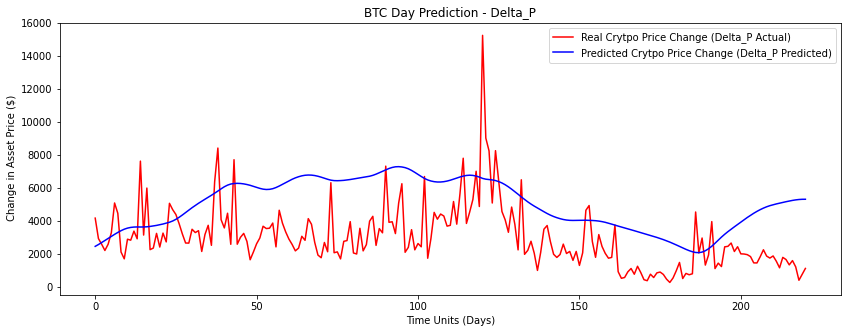

In [2163]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Crytpo Price Change (Delta_P Actual)')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Crytpo Price Change (Delta_P Predicted)')
plt.title('BTC Day Prediction - Delta_P')
plt.xlabel('Time Units (Days)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

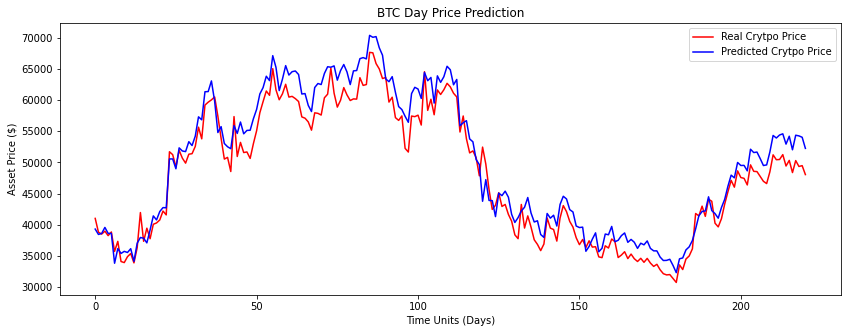

In [2164]:
plt.figure(figsize=(14,5))
plt.plot(price_list, color = 'red', label = 'Real Crytpo Price')
plt.plot(pred_list, color = 'blue', label = 'Predicted Crytpo Price')
plt.title('BTC Day Price Prediction')
plt.xlabel('Time Units (Days)')
plt.ylabel('Asset Price ($)')
plt.legend()
plt.show()

In [2165]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 2710.777194828081


In [2166]:
diff_sum = 0
for i in range(0, len(price_list)):
    diff = abs((price_list[i] - pred_list[i]) / price_list [i])
    diff_sum = diff_sum + diff
    
MAPE = diff_sum[0]/len(price_list)
    
print("Mean Absolue Percentage Error (MAPE):", MAPE)

Mean Absolue Percentage Error (MAPE): 0.04934864993548501


In [2167]:
dir_match_count = 0
price_diff = 0
pred_diff = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1)
        
print("Correct Direction Prediction Accuracy:", correct_dir_perc)

Correct Direction Prediction Accuracy: 0.7863636363636364
